# <span style="color:cyan"> Ejercicio 1 - Preparación del Ambiente de Trabajo

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10, 6)
import helpers as hp
import re
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]

# eliminamos el string de url que no sirve para el análisis
df = df.loc[:, 'n_tokens_title':'shares']

# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

In [6]:
df.head(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [7]:
df.isna().value_counts()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  LDA_00  LDA_01  LDA_02  LDA_03  LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title

In [8]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

### Genere una análisis descriptivo de cada uno de los atributos

In [9]:
df.drop('shares', axis=1).describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


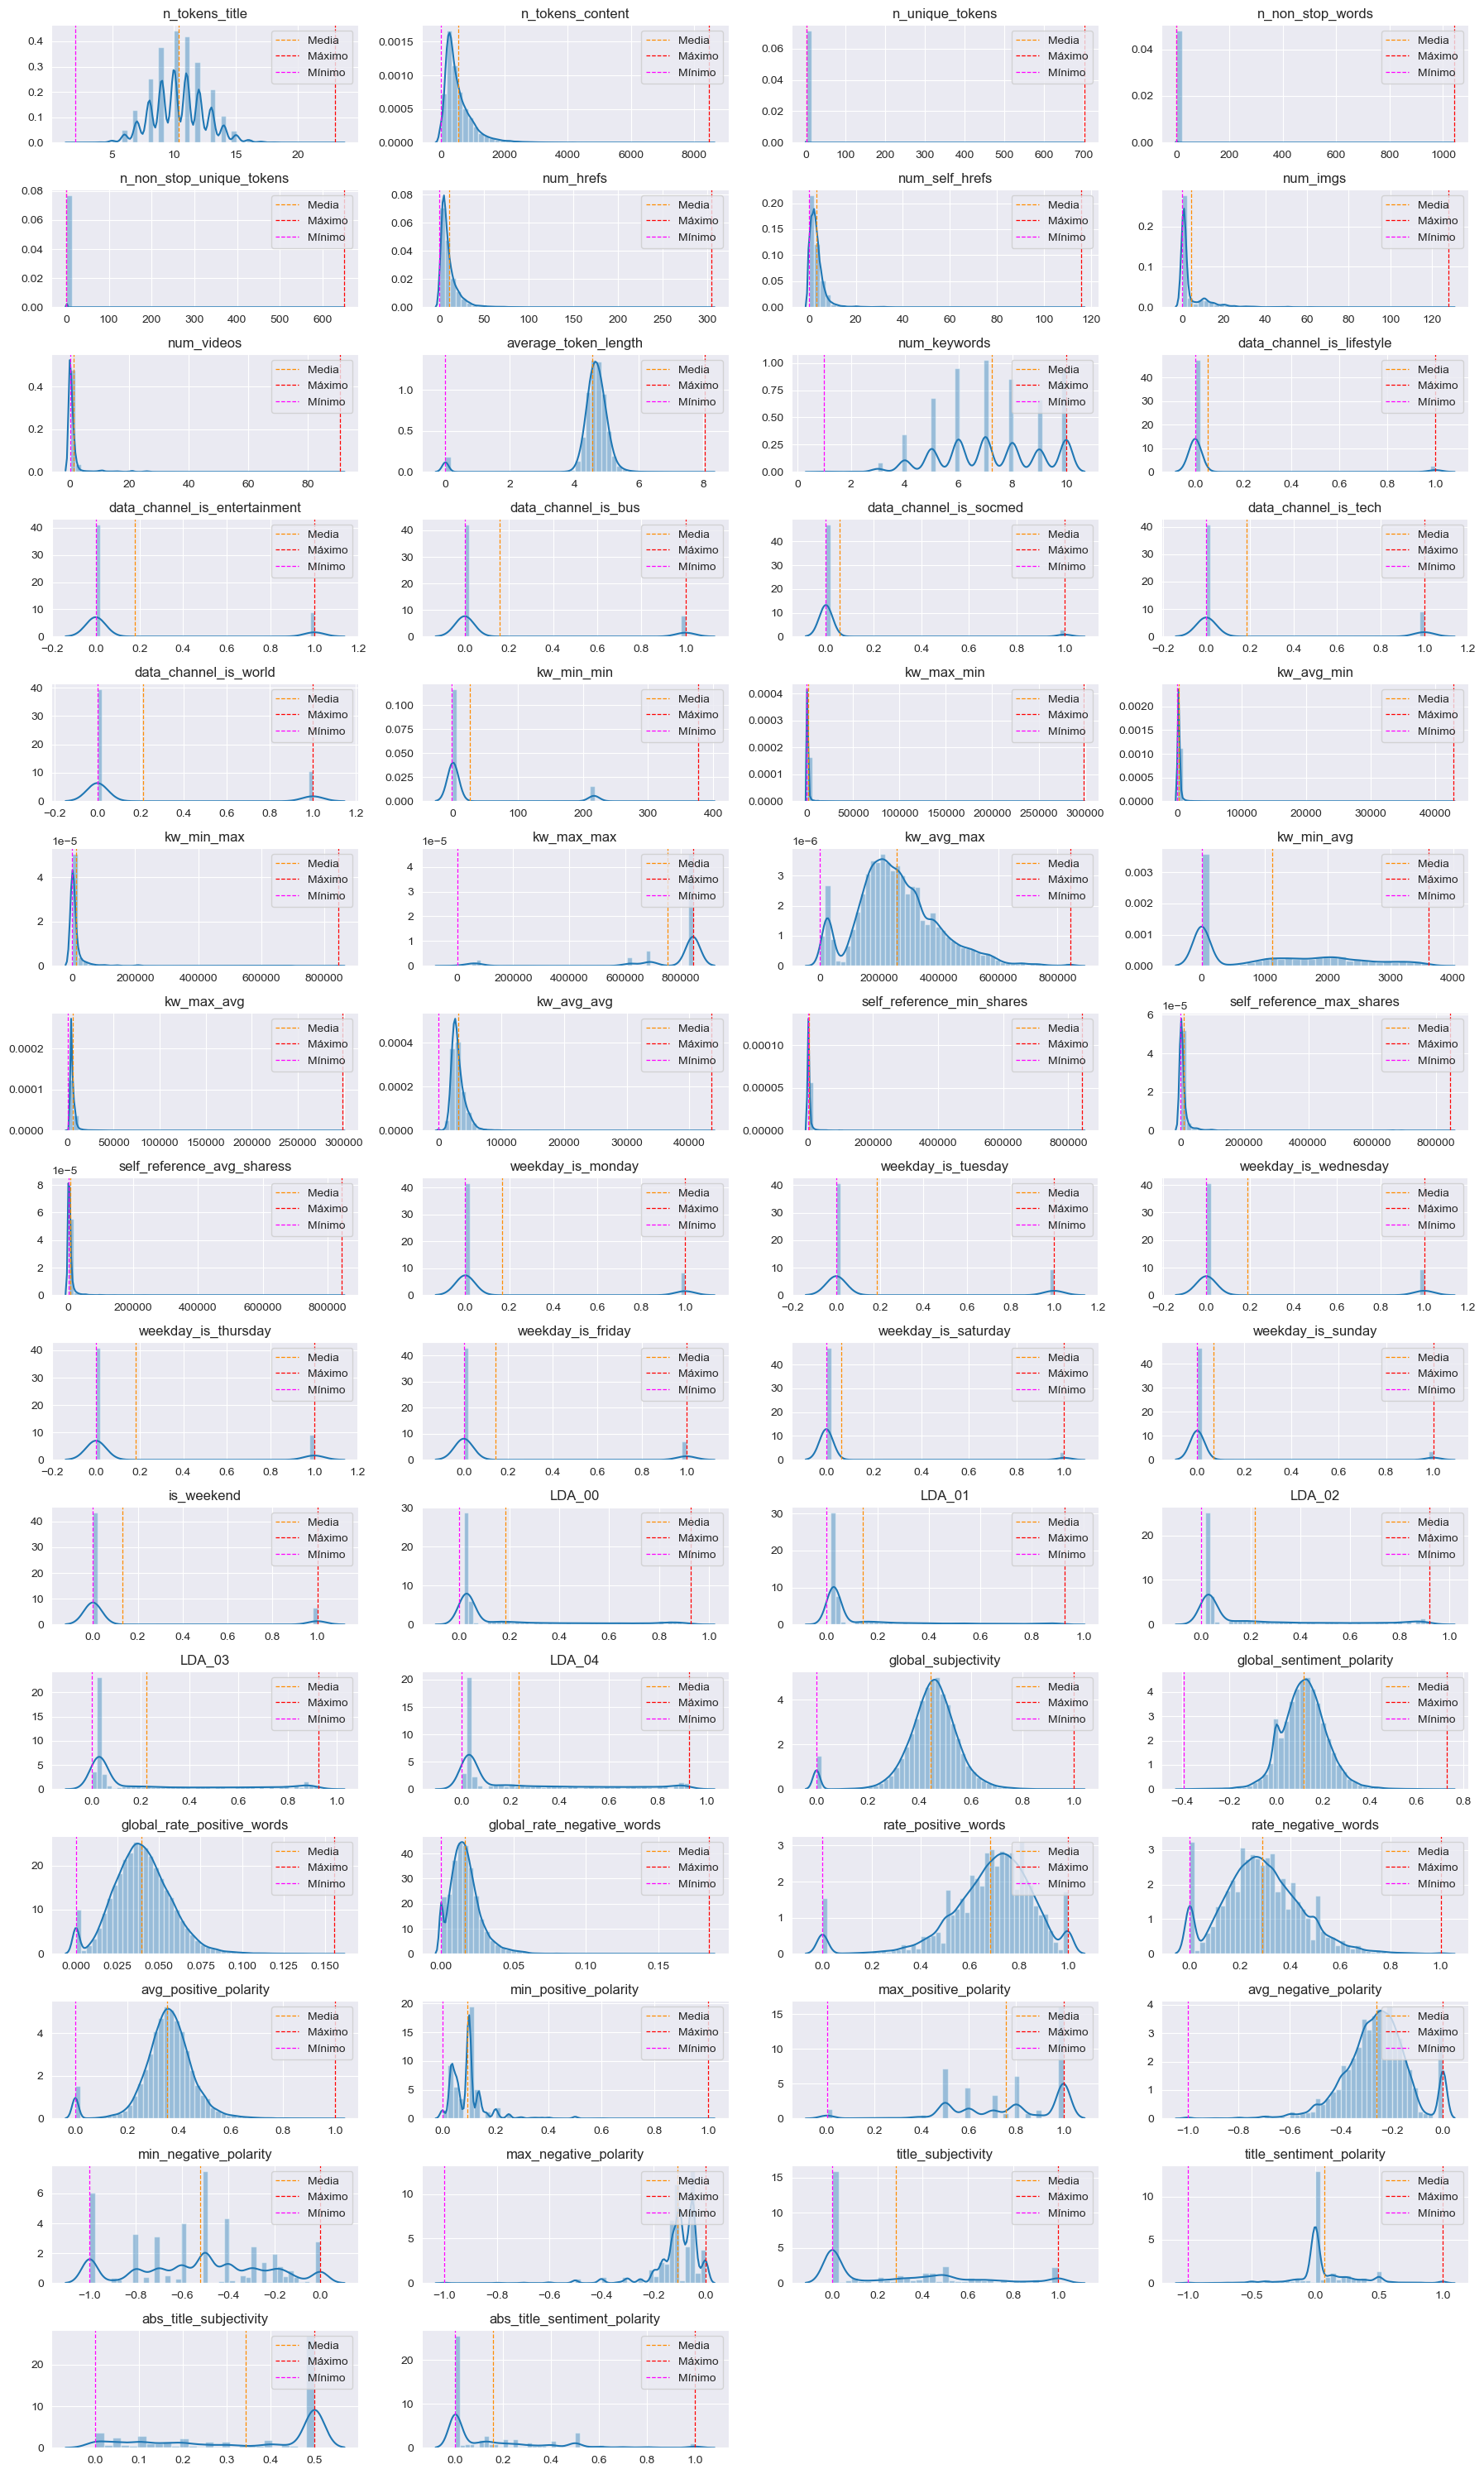

In [10]:
plt.figure(figsize=(18, 30))
hp.grid_plot_batch(df=df.drop('shares', axis=1), cols=4, plot_type=sns.distplot)

    Se observa que las variables 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words' y 'avg_positive_polarity' tienen una distribución similar a la normal.
    Las variables binarias presentan un gran desbalance, en donde el valor 0 es el mayoritario.
    Los atributos 'LDA' tienen un alto sesgo para los valores bajos cercanos a 0.


### Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función identify_high_correlations que se encuentra en el archivo helpers.py. Para todos aquellos atributos que tengan una correlación de .8, reporte sus nombres.

In [11]:
corr_variables = hp.identify_high_correlations(df, threshold=.8)
corr_variables

,variable,var2,value
179,n_non_stop_words,n_unique_tokens,0.999572
238,n_non_stop_unique_tokens,n_unique_tokens,0.999852
239,n_non_stop_unique_tokens,n_non_stop_words,0.999532
1139,kw_avg_min,kw_max_min,0.940529
1256,kw_max_max,kw_min_min,-0.857226
1499,kw_avg_avg,kw_max_avg,0.811864
1678,self_reference_avg_sharess,self_reference_min_shares,0.818907
1679,self_reference_avg_sharess,self_reference_max_shares,0.853480
2317,LDA_02,data_channel_is_world,0.836618


### <span style="color:orange">  Recodificación 'shares'

In [12]:
df['shares_binary'] = np.where(df['shares'] > 1400, 1, 0)
df = df.drop('shares', axis=1).copy()

### <span style="color:orange">  Eliminación variables con correlación mayor a .8

In [13]:
drop_vars_1 = corr_variables.variable.values
drop_vars_2 = corr_variables.var2.values

all_drop_vars = list(set(drop_vars_1) | set(drop_vars_2))
all_drop_vars

['kw_avg_min',
 'n_non_stop_words',
 'data_channel_is_world',
 'kw_max_min',
 'kw_max_max',
 'self_reference_min_shares',
 'n_non_stop_unique_tokens',
 'kw_max_avg',
 'n_unique_tokens',
 'LDA_02',
 'kw_min_min',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'self_reference_max_shares']

In [14]:
df = df.drop(all_drop_vars, axis=1)

In [15]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subje

In [16]:
df.shape

(39644, 45)

### <span style="color:orange">  Análisis de Componentes Principales para extraer las principales 30 dimensiones.

In [17]:
#from sklearn.decomposition import PCA

X = df.drop('shares_binary', axis=1)

# ajusto PCA
n_components=30
pca = PCA(n_components=n_components).fit(X)
pca_data = pca.transform(X)

# guarda las dimensiones en un nuevo objeto
pca_df = pd.DataFrame(pca_data , columns=['Dim_{}'.format(i) for i in range(1, n_components + 1)])
pca_df

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7,Dim_8,Dim_9,Dim_10,...,Dim_21,Dim_22,Dim_23,Dim_24,Dim_25,Dim_26,Dim_27,Dim_28,Dim_29,Dim_30
0,-256653.185964,39276.011726,371.759989,-416.847670,-2.862127,-0.162879,0.363324,-0.437297,1.850877,3.397152,...,0.236040,0.025141,0.028054,-0.074206,-0.028127,0.289224,0.113960,0.188073,-0.199541,0.210303
1,-256653.197639,39276.020239,371.442853,-380.865129,-4.334152,-0.375137,0.106721,-1.363492,-1.291975,4.101327,...,-0.091939,-0.071524,-0.156442,-0.182320,0.259081,-0.041832,0.062364,-0.089915,0.054601,0.097344
2,-256653.183375,39276.009840,371.831757,-424.859630,-3.765199,-0.497442,0.196878,-1.279896,-1.102712,2.074485,...,0.341079,0.004415,-0.629538,0.348136,-0.017748,0.174702,-0.184716,0.106092,0.033269,-0.622316
3,-256653.287200,39276.085379,369.001495,-104.837048,-2.054433,2.163008,-0.727721,-3.160191,-0.950825,1.115173,...,0.083409,0.033506,-0.078808,0.026073,-0.082999,-0.055938,-0.038426,-0.018686,0.062890,-0.027442
4,-256653.462750,39276.213090,364.196574,436.366452,9.409739,-11.168702,2.555840,12.952868,2.809544,2.261836,...,-0.010161,-0.063567,-0.157506,0.015588,0.142286,0.117520,-0.091723,0.069880,-0.222815,-0.066967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,115974.716727,-10455.724707,-1030.325695,-169.558134,-1.428409,2.715493,-0.233464,4.405503,0.599330,-1.485162,...,0.169847,-0.006219,-0.001896,0.040189,-0.113877,0.005742,0.016090,-0.004042,-0.006743,-0.033054
39640,-66357.981138,6489.420203,-752.383524,-248.191789,1.031048,6.057116,46.957440,-2.969361,0.377045,0.849628,...,-0.793269,0.182474,0.290995,0.062955,-0.768524,-0.414865,0.175933,0.044296,0.171726,-0.174059
39641,34305.614123,-14675.562711,-571.138767,-94.794121,14.990860,-2.691219,-0.883044,-3.922934,-0.130922,-0.706565,...,0.184477,-0.029140,-0.008607,-0.161910,0.056898,-0.227922,0.208746,0.218618,-0.249388,0.021047
39642,-7350.307192,-12383.270183,1043.845239,145.212001,-2.898736,2.814855,-2.097137,-1.831114,-4.681533,2.048642,...,-0.018612,-0.045460,0.298398,-0.126475,0.162475,-0.368302,0.006291,-0.095202,0.008392,0.025385


In [18]:
print("Varianza acumulada con 30 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 30 dimensiones: 0.9999999999967254


In [19]:
pca_df.shape

(39644, 30)

# <span style="color:cyan"> Ejercicio 2 - Evaluación de modelos individuales

In [20]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.cluster import KMeans
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
rep_seed = 94

# conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(pca_df , df['shares_binary'], test_size=0.33, random_state=rep_seed)

# Instanciación de los modelos
lr_model = LogisticRegression(random_state=rep_seed, n_jobs=-1)
kmeans_model = KMeans(n_clusters=2, random_state=rep_seed) # para el caso de KMeans es necesario definir la cantidad de clusters a inferir
dec_tree_model_md_1 = DecisionTreeClassifier(max_depth=1, random_state=rep_seed)
dec_tree_model_md_4 = DecisionTreeClassifier(max_depth=4, random_state=rep_seed)

In [21]:
# Entrenamiento de los modelos
lr_model.fit(X_train, y_train)
kmeans_model.fit(X_train)
dec_tree_model_md_1.fit(X_train, y_train)
dec_tree_model_md_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=94)

In [22]:
# Predicciones de los modelos
lr_yhat = lr_model.predict(X_test)
kmeans_yhat = kmeans_model.predict(X_test)
dec_tree_md_1_yhat = dec_tree_model_md_1.predict(X_test)
dec_tree_md_4_yhat = dec_tree_model_md_4.predict(X_test)

In [23]:
# Función para mostrar métricas
def show_metrics(y_true, y_hat):
    print(f'- Precision Score: {precision_score(y_true, y_hat).round(2)}')
    print(f'- Recall Score: {recall_score(y_true, y_hat).round(2)}')
    print(f'- F1 Score: {f1_score(y_true, y_hat).round(2)}\n')
    print(classification_report(y_true, y_hat))
    hp.plot_classification_report(y_true, y_hat)

### <span style="color:orange"> Logistic Regression

Logistic Regression Model Report:
- Precision Score: 0.53
- Recall Score: 0.51
- F1 Score: 0.52

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      6614
           1       0.53      0.51      0.52      6469

    accuracy                           0.54     13083
   macro avg       0.54      0.54      0.54     13083
weighted avg       0.54      0.54      0.54     13083



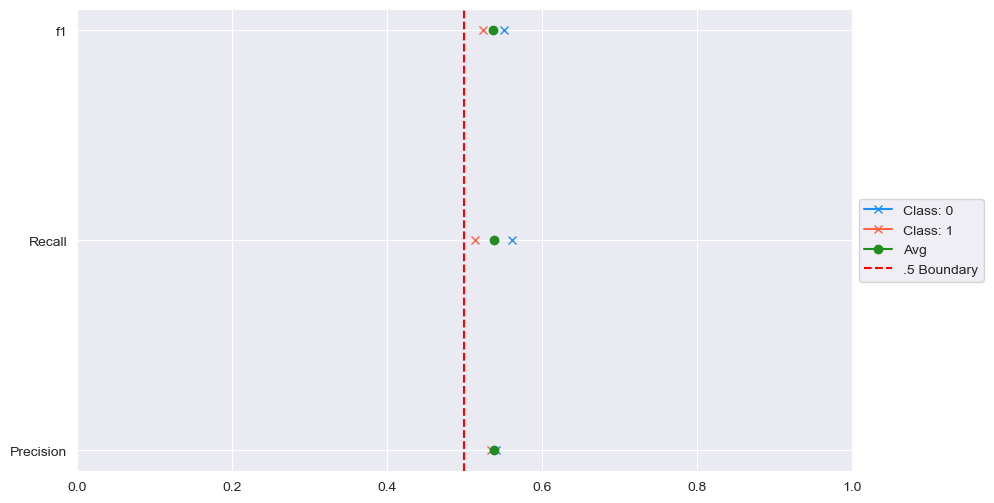

In [24]:
print("Logistic Regression Model Report:")
show_metrics(y_test, lr_yhat)

    Se observa que el desempeño general para el modelo de Regresión Logística es levemente superior a un clasificador aleatorio.

### <span style="color:orange"> KMeans

KMeans Report:
- Precision Score: 0.53
- Recall Score: 0.37
- F1 Score: 0.43

              precision    recall  f1-score   support

           0       0.52      0.68      0.59      6614
           1       0.53      0.37      0.43      6469

    accuracy                           0.53     13083
   macro avg       0.53      0.52      0.51     13083
weighted avg       0.53      0.53      0.51     13083



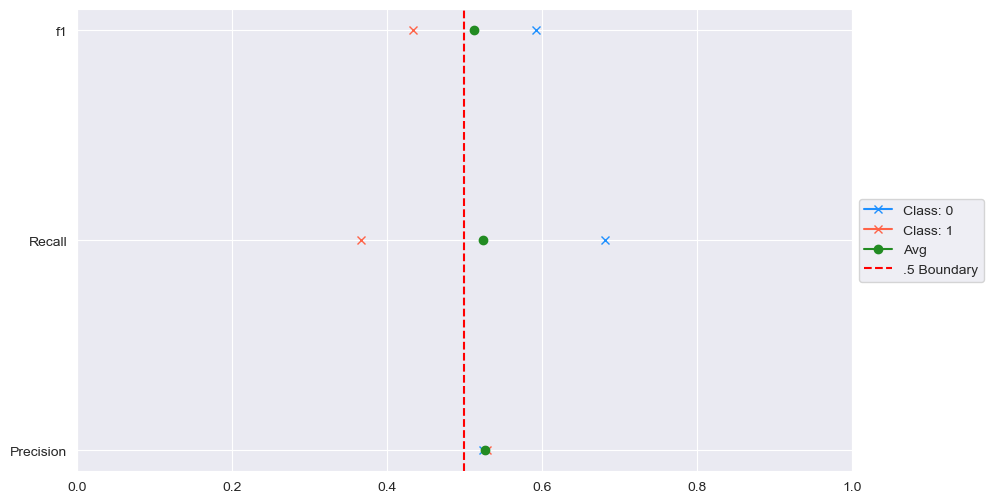

In [25]:
print("KMeans Report:")
show_metrics(y_test, kmeans_yhat)

    Se observa que el desempeño general para el modelo de KMeans es sustancialmente peor que un clasificador aleatorio para la clase 1 tomando como referencia las métricas f1 y recall.

### <span style="color:orange"> DecisionTreeClassifier, max_depth=1

DecisionTreeClassifier (max_depth=1) Report:
- Precision Score: 0.66
- Recall Score: 0.24
- F1 Score: 0.36

              precision    recall  f1-score   support

           0       0.54      0.87      0.67      6614
           1       0.66      0.24      0.36      6469

    accuracy                           0.56     13083
   macro avg       0.60      0.56      0.51     13083
weighted avg       0.60      0.56      0.51     13083



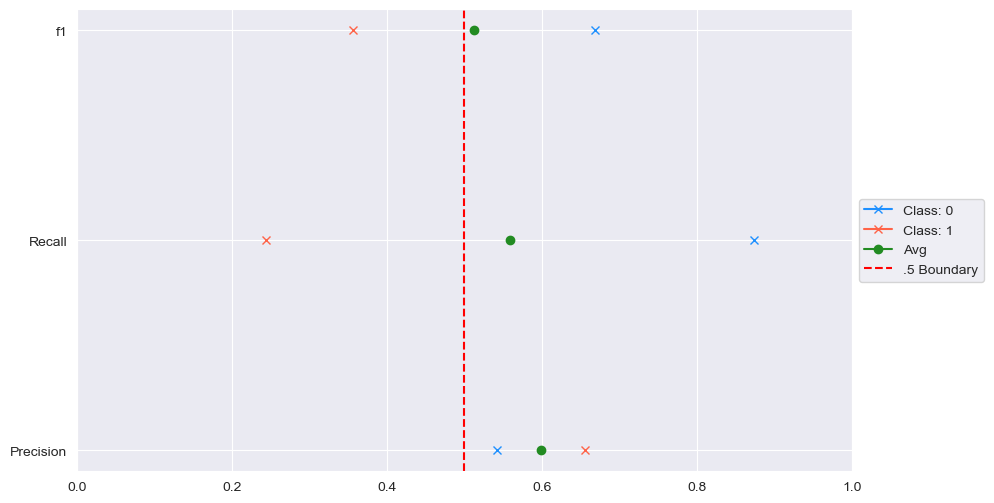

In [26]:
print("DecisionTreeClassifier (max_depth=1) Report:")
show_metrics(y_test, dec_tree_md_1_yhat)

    El modelo DecisionTreeClassifier (max_depth=1) tiene un pésimo desempeño para la clase 1 considerando las métricas recall y f1. Es más deficiente que el modelo implementado con KMeans.

### <span style="color:orange"> DecisionTreeClassifier, max_depth=4

DecisionTreeClassifier (max_depth=4) Report:
- Precision Score: 0.62
- Recall Score: 0.5
- F1 Score: 0.55

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      6614
           1       0.62      0.50      0.55      6469

    accuracy                           0.60     13083
   macro avg       0.61      0.60      0.60     13083
weighted avg       0.61      0.60      0.60     13083



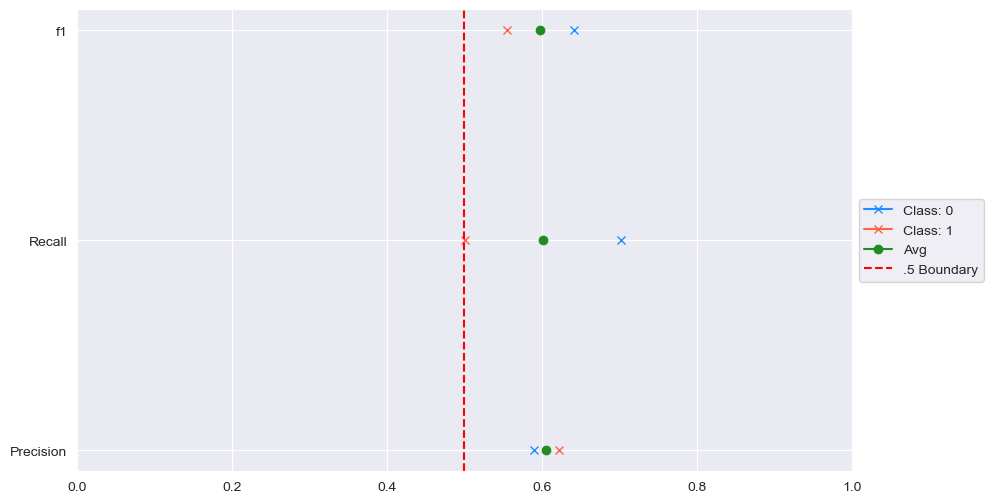

In [27]:
print("DecisionTreeClassifier (max_depth=4) Report:")
show_metrics(y_test, dec_tree_md_4_yhat)

    El modelo DecisionTreeClassifier (max_depth=4) tiene un desempeño general correcto superando notoriamente los modelos anteriores KMeans y DecisionTreeClassifier (max_depth=1), teniendo todas sus métricas por sobre un clasificador aleatorio.

# <span style="color:cyan"> Ejercicio 3 - Entrenamiento de Comité

In [28]:
estimators = [
    ('Logistic_Regression', LogisticRegression(random_state=rep_seed)),
    #('KMeans', KMeans(n_clusters=2, random_state=rep_seed)), # para el caso de KMeans es necesario definir la cantidad de clusters a inferir
    ('Decision_Tree_Classifier_max_depth_1', DecisionTreeClassifier(max_depth=1, random_state=rep_seed)),
    ('Decision_Tree_Classifier_max_depth_4', DecisionTreeClassifier(max_depth=4, random_state=rep_seed))
    ]

    Nota: Al considerar KMeans en los estimadores, VotingClassifier() arroja error.

In [29]:
# ajuste VotingClassifier
voting_classifier = VotingClassifier(estimators, n_jobs=-1).fit(X_train, y_train)

# predicciones
y_hat = voting_classifier.predict(X_test)

- Precision Score: 0.64
- Recall Score: 0.34
- F1 Score: 0.45

              precision    recall  f1-score   support

           0       0.56      0.81      0.66      6614
           1       0.64      0.34      0.45      6469

    accuracy                           0.58     13083
   macro avg       0.60      0.58      0.55     13083
weighted avg       0.60      0.58      0.56     13083



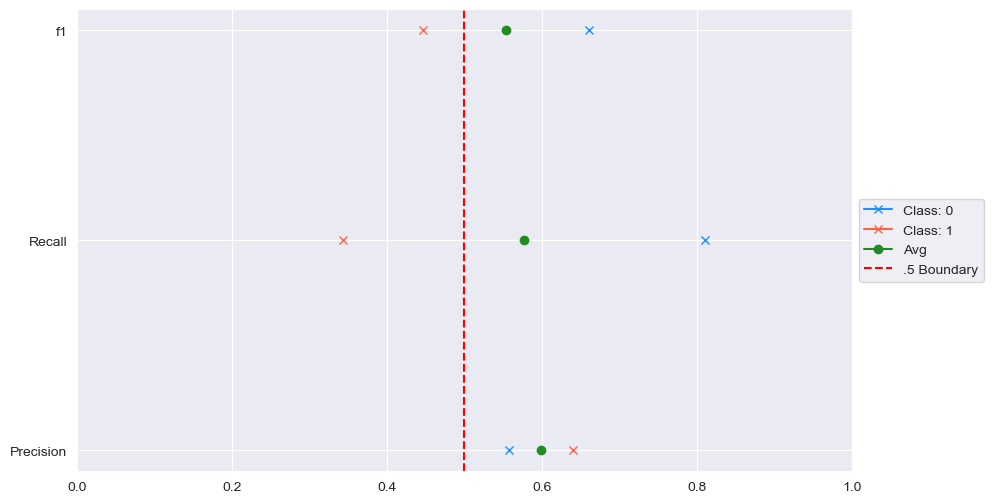

In [30]:
show_metrics(y_test, y_hat)

# <span style="color:cyan"> Ejercicio 4 - Calibración de Comité con Ponderadores

In [31]:
# Función obtenida del autoaprendizaje
def weighting_schedule(voting_ensemble, X_train, X_test, y_train, y_test, weights_dict, plot_scheme=True, plot_performance=True):
    def weight_scheme():
        """TODO: Docstring for weight_scheme.
        :returns: TODO

        """
        weights = pd.DataFrame(weights_dict)
        weights['model'] = [i[0] for i in voting_ensemble.estimators]
        weights = weights.set_index('model')
        sns.heatmap(weights, annot=True, cmap='Blues', cbar=False)
        plt.title('Esquema de Ponderación')

    def weight_performance():
        n_scheme = len(weights_dict)
        f1_metrics, accuracy = [], []
        f1_metrics_train, accuracy_train = [], []

        for i in weights_dict:
            model = voting_ensemble.set_params(weights=weights_dict[i]).fit(X_train, y_train)
            tmp_model_yhat = model.predict(X_test)
            tmp_model_yhat_train = model.predict(X_train)
            f1_metrics.append(f1_score(y_test, tmp_model_yhat).round(3))
            f1_metrics_train.append(f1_score(y_train, tmp_model_yhat_train).round(3))
            accuracy.append(accuracy_score(y_test, tmp_model_yhat).round(3))
            accuracy_train.append(accuracy_score(y_train, tmp_model_yhat_train).round(3))
        plt.plot(range(n_scheme), accuracy, 'o', color='tomato', alpha=.5, label='Exactitud-Test')
        plt.plot(range(n_scheme), f1_metrics, 'x', color='tomato', alpha=.5, label='F1-Test')
        plt.plot(range(n_scheme), accuracy_train, 'o', color='dodgerblue', alpha=.5, label='Exactitud-Train')
        plt.plot(range(n_scheme), f1_metrics_train, 'x', color='dodgerblue', alpha=.5, label='F1-Train')
        plt.xticks(ticks=range(n_scheme), labels=list(weights_dict.keys()), rotation=90)
        plt.title('Desempeño en Train/Test')
        plt.legend(loc='center left', bbox_to_anchor=(1, .5))

    if plot_scheme is True and plot_performance is True:
        plt.subplot(1, 2, 1)
        weight_scheme()
        plt.subplot(1, 2, 2)
        weight_performance()
    else:
        if plot_scheme is True:
            weight_scheme()
        elif plot_performance is True:
            weight_performance()

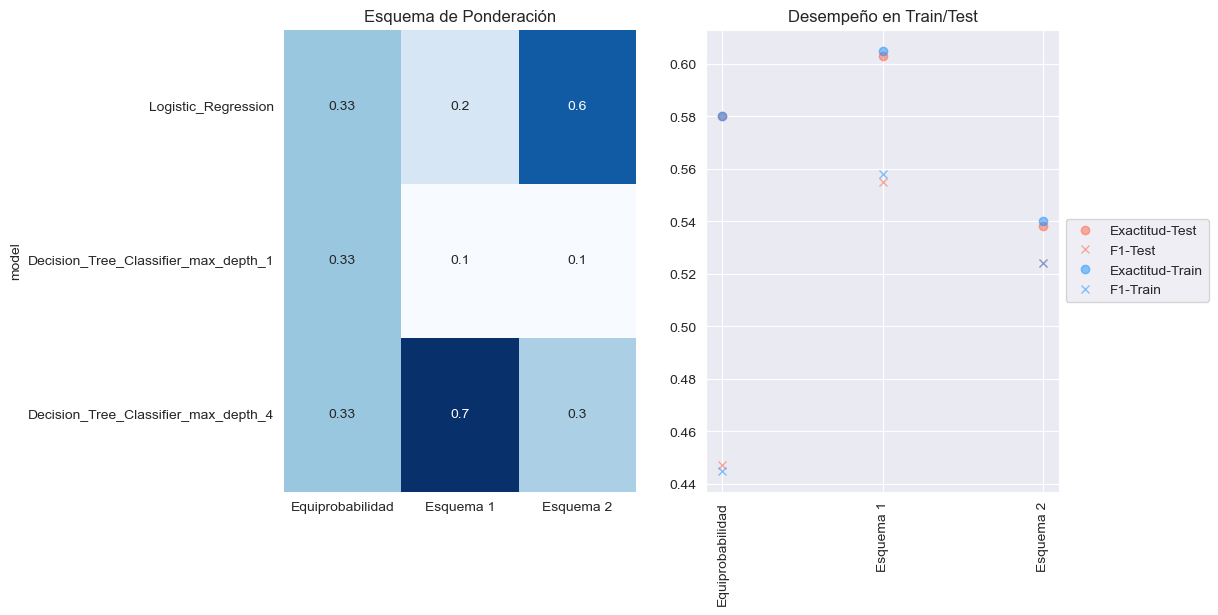

In [32]:
# definimos un diccionario con el esquema de ponderación a aplicar
weights_hyperparams = {
    'Equiprobabilidad': [1/3, 1/3, 1/3],
    'Esquema 1': [0.2, 0.1, 0.7],
    'Esquema 2': [0.6, 0.1, 0.3]
}

# implementamos la evaluación del modelo
weighting_schedule(voting_classifier, X_train, X_test, y_train, y_test, weights_hyperparams)

    Como se observa, al disminuir la ponderación del árbol de decisión con max_depth=1, las métricas mejoran y los puntajes F1 superan a un clasificador aleatorio.
    El mejor esquema corresponde al 'Esquema 1': [0.2, 0.1, 0.7]